### First chapter is an introduction. Algorithms are introduced from chapter-2

### Chapter-2 : State Space search
 The problem of <b>River Crossing</b>: Man, Goat,Lion and Cabbage with a boat of capacity not more than 2 objects are in a situation to cross the river using the boat. Man drives the boat and carries either of the object with him. But in the absence of the Man, the Goat eats the cabbage or the Lion devours the Goat. We would like to reach the opposite side without any damage to the state. <br>
Algorithms to generate the possible sequence states of the given state and to check if the given state is the goal state can be devised as follows. <br>

In [6]:
import copy
import numpy as np

In [7]:
class RiverCrossing:
    def __init__(self):
        pass
    
    def check_validity(self,state):
        if len(state[0])+len(state[1])==4:
            d={val:0 for val in ["M","C","L","G"]}
            for val in state[0]+state[1]:
                d[val]=1
            return sum(d.values())==4
        return False

    def MoveGen(self,CurrentState):
        """
        Given current state is expected to be a list of length 2 with values on left and right. String values
        """
        if not(self.check_validity(CurrentState)):
            print("Give Valid state")
            return []
        States=[]
        L,R=copy.deepcopy(CurrentState)
        side=L if "M" in L else R
        ind=1 if "M" in L else 0
        for val in side:
            newstate=copy.deepcopy(CurrentState)
            newstate[(ind+1)%2].remove("M")
            newstate[ind].append("M")
            if val!="M":
                newstate[(ind+1)%2].remove(val)
                newstate[ind].append(val)
            States.append(newstate)
        return States

    def GoalTest(self,state):
        if not(self.check_validity(state)):
            print("Give Valid state")
            return []
        if (sorted(["M","L","C","G"]) == sorted(state[1])) and len(state[0])==0: 
            return True
        return False

river=RiverCrossing()
currentstate=[['M' ,'G'], ['L','C']]
print(currentstate, "possible next moves are : ",river.MoveGen(currentstate))

for move in river.MoveGen(currentstate):
    if river.GoalTest(move):
        print("Goal Reached from :",currentstate)
        print("Goal :",move)

print(river.check_validity([["M","M","L"],["G"]]))

[['M', 'G'], ['L', 'C']] possible next moves are :  [[['G'], ['L', 'C', 'M']], [[], ['L', 'C', 'M', 'G']]]
Goal Reached from : [['M', 'G'], ['L', 'C']]
Goal : [[], ['L', 'C', 'M', 'G']]
False


##### Simple Search algorithms
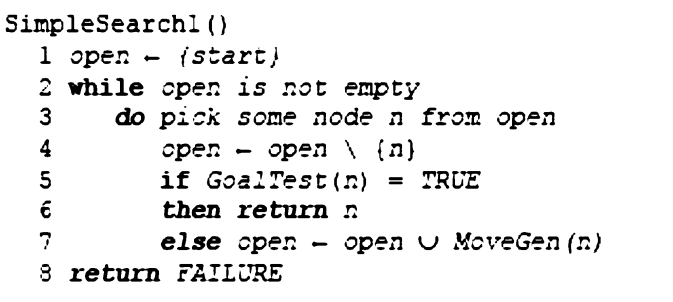
Algo 1: Simply searches the entire space and returns if solution is found. But prone to getting caught up in an infinity loop
<br>

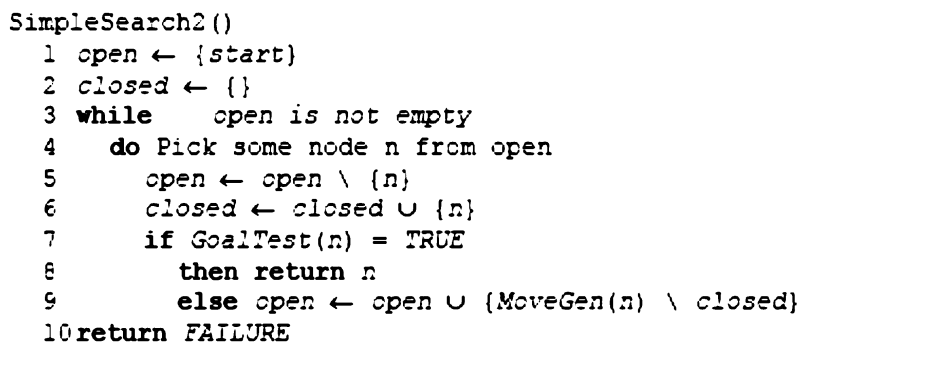
<br>
Algo 2: Better than previous algo, does not add already searched nodes to the search space again

###### Solving the problem on the following graph
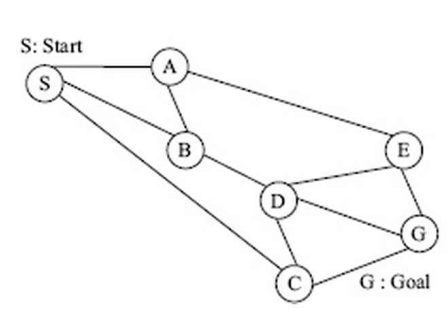

In [1]:
d={}
# Adjacency list representation of the graph
def addEdge(graph,a,b):
    if a in graph:
        graph[a].append(b)
    else:
        graph[a]=[b]
    if b in graph:
        graph[b].append(a)
    else:
        graph[b]=[a]
    
addEdge(d,'S','A')
addEdge(d,'S','B')
addEdge(d,'S','C')
addEdge(d,'A','B')
addEdge(d,'A','E')
addEdge(d,'B','D')
addEdge(d,'D','E')
addEdge(d,'E','G')
addEdge(d,'D','G')
addEdge(d,'D','C')
addEdge(d,'G','C')

print(d)

{'S': ['A', 'B', 'C'], 'A': ['S', 'B', 'E'], 'B': ['S', 'A', 'D'], 'C': ['S', 'D', 'G'], 'E': ['A', 'D', 'G'], 'D': ['B', 'E', 'G', 'C'], 'G': ['E', 'D', 'C']}


##### Helper function

In [10]:
def SimpleSearch1(start,graph,goal):
    OPEN=[start]
    while len(OPEN):
        node=OPEN.pop(0)
        print(node)
        if GoalReached(node,goal):
            return node
        else:
            for n in neighbours(node,graph):
                OPEN.append(n)
        print("OPEN :",OPEN)
    return -1

# The above algorithm is prone to getting caught up in an infinity loop

def SimpleSearch2(start,graph,goal):
    visited={start:True}
    OPEN=[start]
    CLOSED=[]
    while len(OPEN):
        
        node=OPEN.pop(0)
        print(node)
        CLOSED.append(node)
        if GoalReached(node,goal):
            return node
        else:
            visited[node]=True
            UpdateClosed(node,CLOSED)
            for n in RemoveSeen1(neighbours(node,graph),CLOSED):
                OPEN.append(n)
        print("OPEN :",OPEN)
        print("CLOSED :",CLOSED)
    return -1

print("Simple Search 1:")
print(SimpleSearch1('S',d,'G'))
print()
print("Simple Search 2:")
print(SimpleSearch2('S',d,'G'))

Simple Search 1:
S
OPEN : ['A', 'B', 'C']
A
OPEN : ['B', 'C', 'S', 'B', 'E']
B
OPEN : ['C', 'S', 'B', 'E', 'S', 'A', 'D']
C
OPEN : ['S', 'B', 'E', 'S', 'A', 'D', 'S', 'D', 'G']
S
OPEN : ['B', 'E', 'S', 'A', 'D', 'S', 'D', 'G', 'A', 'B', 'C']
B
OPEN : ['E', 'S', 'A', 'D', 'S', 'D', 'G', 'A', 'B', 'C', 'S', 'A', 'D']
E
OPEN : ['S', 'A', 'D', 'S', 'D', 'G', 'A', 'B', 'C', 'S', 'A', 'D', 'A', 'D', 'G']
S
OPEN : ['A', 'D', 'S', 'D', 'G', 'A', 'B', 'C', 'S', 'A', 'D', 'A', 'D', 'G', 'A', 'B', 'C']
A
OPEN : ['D', 'S', 'D', 'G', 'A', 'B', 'C', 'S', 'A', 'D', 'A', 'D', 'G', 'A', 'B', 'C', 'S', 'B', 'E']
D
OPEN : ['S', 'D', 'G', 'A', 'B', 'C', 'S', 'A', 'D', 'A', 'D', 'G', 'A', 'B', 'C', 'S', 'B', 'E', 'B', 'E', 'G', 'C']
S
OPEN : ['D', 'G', 'A', 'B', 'C', 'S', 'A', 'D', 'A', 'D', 'G', 'A', 'B', 'C', 'S', 'B', 'E', 'B', 'E', 'G', 'C', 'A', 'B', 'C']
D
OPEN : ['G', 'A', 'B', 'C', 'S', 'A', 'D', 'A', 'D', 'G', 'A', 'B', 'C', 'S', 'B', 'E', 'B', 'E', 'G', 'C', 'A', 'B', 'C', 'B', 'E', 'G', 'C']
G
G

In [57]:
def GoalReached(node,goal):
    return node==goal

def neighbours(node,graph):
    # O(1) complex
    # as the representation is adjacency list
    return graph[node]

def UpdateClosed(node, CLOSED):
    if node not in CLOSED:
        CLOSED.append(node)

def RemoveSeen1(a,b):
    d={}
    l=[]
    for node in b:
        d[node[0]]=1
    for node in a:
        if d.get(node,0)==0:
            l.append(node)
    return l

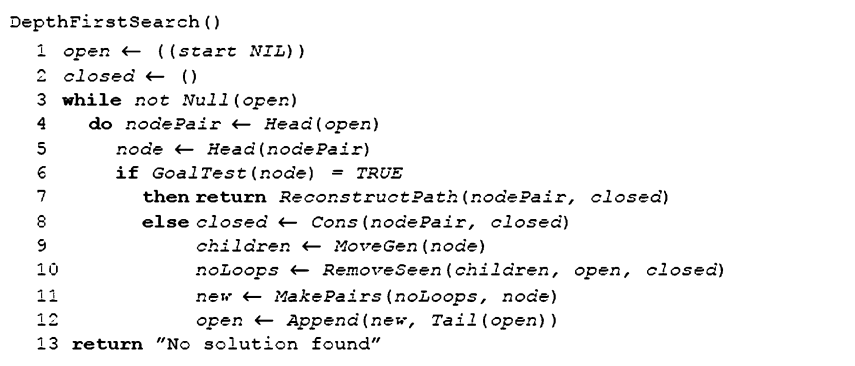
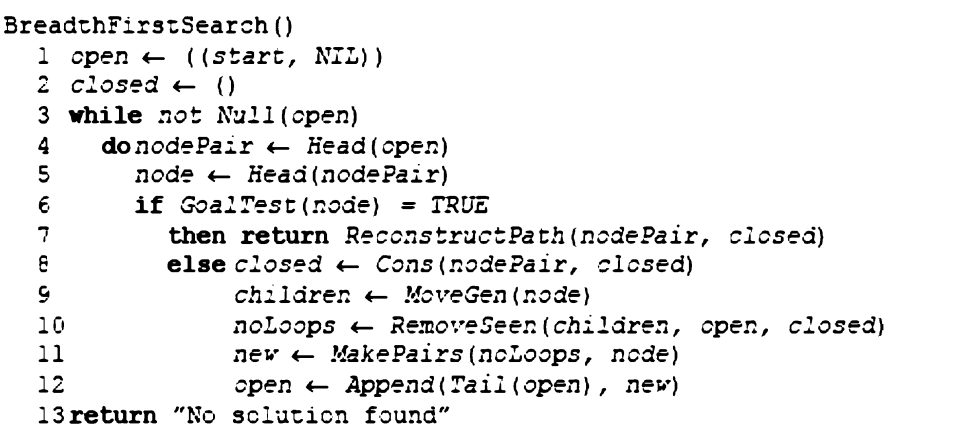

##### Helper functions

In [56]:
def RemoveSeen(a,b,c):
    # O(N) complexity
    d={}
    l=[]
    for node in b:
        d[node[0]]=1
    for node in c:
        d[node[0]]=1
    for node in a:
        if d.get(node,0)==0:
            l.append(node)
    return l

def ReconstructPath(nodepair,CLOSED):
    # O(N) complex
    path=[]
    path.append(nodepair[0])
    parent=nodepair[1]
    for pair in CLOSED:
        if pair[0]==parent:
            path.append(pair[0])
            parent=pair[1]
            if parent==-1:
                break
    return path[::-1]

In [60]:
def DFS(start,graph,goal):
    # O(N*N) if neighbours are not sorted else O(N*NlogN)
    OPEN=[(start,-1)]
    CLOSED=[]
    while len(OPEN) :
        nodepair=OPEN.pop(0)
        node,parent=nodepair
        print(node)
        if GoalReached(node,goal):
            return ReconstructPath(nodepair,CLOSED)
        else:
            CLOSED.insert(0,nodepair)
            neighbrs=RemoveSeen(neighbours(node,graph),OPEN,CLOSED)
            for n in sorted(neighbrs,reverse=True):
                OPEN.insert(0,(n,node))
            print("OPEN :",OPEN)
            print("CLOSED :",CLOSED)
    return -1


def BFS(start,graph,goal):
    # O(N*N) if neighbours not sorted else O(N*NlogN)
    OPEN=[(start,-1)]
    CLOSED=[]
    while len(OPEN):
        nodepair=OPEN.pop(0)
        node,parent=nodepair
        print(node)
        if GoalReached(node,goal):
            return ReconstructPath(nodepair,CLOSED)
        else:
            CLOSED.insert(0,nodepair)
            neighbrs=RemoveSeen(neighbours(node,graph),OPEN,CLOSED)
            for n in sorted(neighbrs,reverse=True):
                OPEN.append((n,node))
            print("OPEN :",OPEN)
            print("CLOSED :",CLOSED)
    return -1

print("BFS :")
print(BFS('S',d,'G'))

print()

print("DFS:")
print(DFS("S",d,'G'))

BFS :
S
OPEN : [('C', 'S'), ('B', 'S'), ('A', 'S')]
CLOSED : [('S', -1)]
C
OPEN : [('B', 'S'), ('A', 'S'), ('G', 'C'), ('D', 'C')]
CLOSED : [('C', 'S'), ('S', -1)]
B
OPEN : [('A', 'S'), ('G', 'C'), ('D', 'C')]
CLOSED : [('B', 'S'), ('C', 'S'), ('S', -1)]
A
OPEN : [('G', 'C'), ('D', 'C'), ('E', 'A')]
CLOSED : [('A', 'S'), ('B', 'S'), ('C', 'S'), ('S', -1)]
G
['S', 'C', 'G']

DFS:
S
OPEN : [('A', 'S'), ('B', 'S'), ('C', 'S')]
CLOSED : [('S', -1)]
A
OPEN : [('E', 'A'), ('B', 'S'), ('C', 'S')]
CLOSED : [('A', 'S'), ('S', -1)]
E
OPEN : [('D', 'E'), ('G', 'E'), ('B', 'S'), ('C', 'S')]
CLOSED : [('E', 'A'), ('A', 'S'), ('S', -1)]
D
OPEN : [('G', 'E'), ('B', 'S'), ('C', 'S')]
CLOSED : [('D', 'E'), ('E', 'A'), ('A', 'S'), ('S', -1)]
G
['S', 'A', 'E', 'G']


##### Depth Bounded DFS
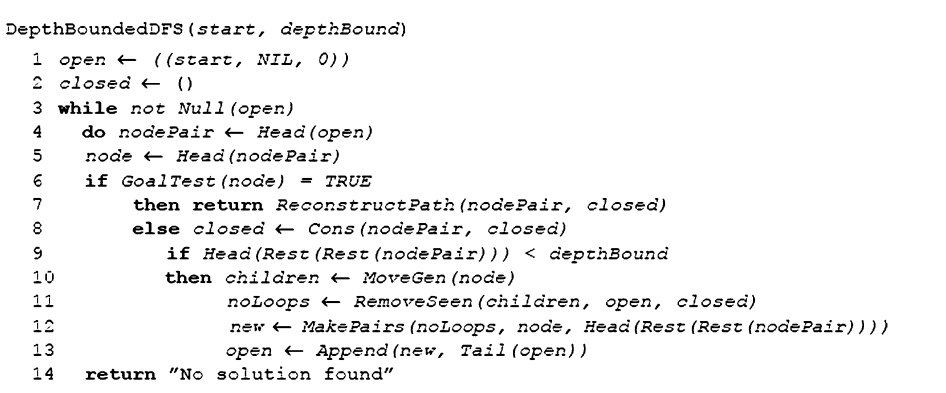

#### DFID
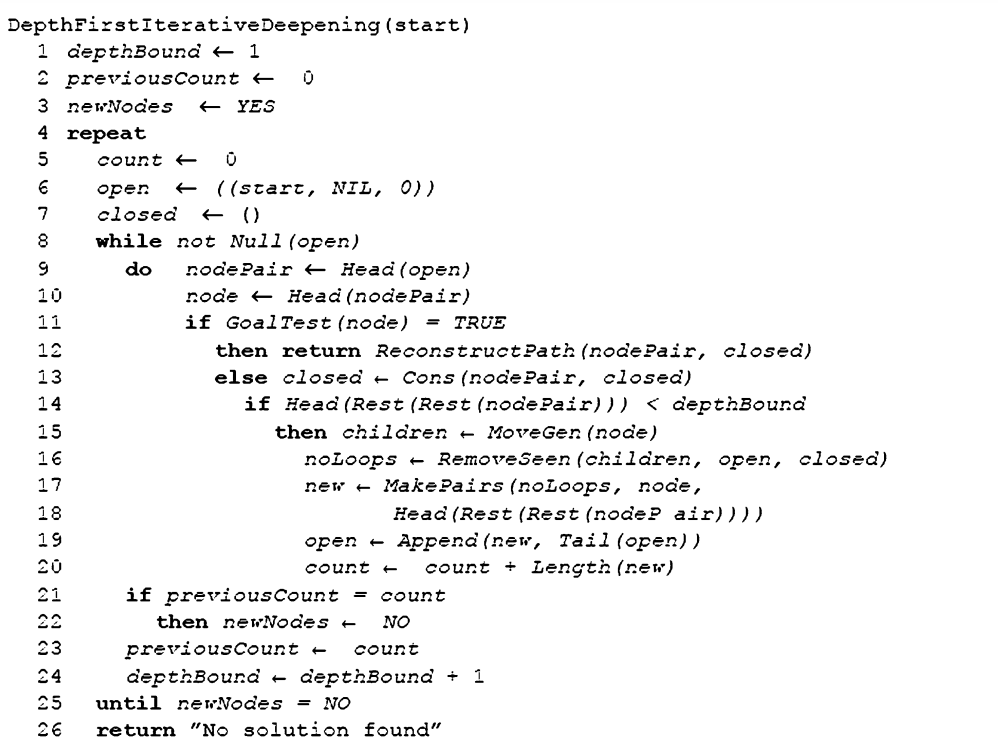

##### Helper

In [28]:
def ReconstructPath2(nodetri,CLOSED):
    # O(1) complex
    path=[]
    parent=nodetri[1]
    path.append(nodetri[0])
    for n in CLOSED:
        if n[0]==parent:
            path.append(n[0])
            parent=n[1]
        if parent==-1:
            break
    return path[::-1]

In [67]:
def DB_DFS(start,graph,depthBound,goal):
    OPEN=[(start,-1,0)]
    CLOSED=[]
    while len(OPEN):
        nodetri=OPEN.pop(0)
        node,parent,depth=nodetri
        if GoalReached(node,goal):
            return ReconstructPath2(nodetri,CLOSED)
        else:
            CLOSED.insert(0,nodetri)
            if depth<depthBound:
                neighbrs=RemoveSeen(neighbours(node,graph),OPEN,CLOSED)
                for n in neighbrs:#sorted(neighbrs,reverse=True):
                    OPEN.insert(0,(n,node,depth+1))
        print("OPEN :",OPEN)
        print("CLOSED :",CLOSED)
    return []

# Version - 2
def DB_DFS2(start,graph,depthBound,goal):
    count=0
    OPEN=[(start,-1,0)]
    CLOSED=[]
    while len(OPEN):
        nodetri=OPEN.pop(0)
        node,parent,depth=nodetri
        if GoalReached(node,goal):
            return (count,ReconstructPath2(nodetri,CLOSED))
        else:
            CLOSED.insert(0,nodetri)
            if depth<depthBound:
                neighbrs=RemoveSeen(neighbours(node,graph),OPEN,CLOSED)
                for n in neighbrs:#sorted(neighbrs,reverse=True):
                    OPEN.insert(0,(n,node,depth+1))
                    count+=1
        print("OPEN :",OPEN)
        print("CLOSED :",CLOSED)
    return count,[]

def DFID1(start,graph,goal):
    depth=0
    paths=[]
    while depth<=len(graph):
        print("Depth :",depth)
        path=DB_DFS(start,graph,depth,goal)
        if path!=[]:
            paths.append(path)
            break
        paths.append(path)
        depth+=1
    return depth,paths[-1]

# Version - 2
def DFID2(start,graph,goal):
    depth=0
    count=-1
    paths=[]
    prevCount=-1
    while depth<=len(graph):
        prevCount=count
        print("Depth:",depth)
        count,path=DB_DFS2(start,graph,depth,goal)
        
        if prevCount==count and path!=[]:
            break
        paths.append(path)
        depth+=1
    return depth,paths[-1]

print("DFID-1 :" )
print(DFID1("S",d,"G"))
print()
print("DFID-2: ")
print(DFID2('S',d,'G'))

DFID-1 :
Depth : 0
OPEN : []
CLOSED : [('S', -1, 0)]
Depth : 1
OPEN : [('C', 'S', 1), ('B', 'S', 1), ('A', 'S', 1)]
CLOSED : [('S', -1, 0)]
OPEN : [('B', 'S', 1), ('A', 'S', 1)]
CLOSED : [('C', 'S', 1), ('S', -1, 0)]
OPEN : [('A', 'S', 1)]
CLOSED : [('B', 'S', 1), ('C', 'S', 1), ('S', -1, 0)]
OPEN : []
CLOSED : [('A', 'S', 1), ('B', 'S', 1), ('C', 'S', 1), ('S', -1, 0)]
Depth : 2
OPEN : [('C', 'S', 1), ('B', 'S', 1), ('A', 'S', 1)]
CLOSED : [('S', -1, 0)]
OPEN : [('G', 'C', 2), ('D', 'C', 2), ('B', 'S', 1), ('A', 'S', 1)]
CLOSED : [('C', 'S', 1), ('S', -1, 0)]
(2, ['S', 'C', 'G'])

DFID-2: 
Depth: 0
OPEN : []
CLOSED : [('S', -1, 0)]
Depth: 1
OPEN : [('C', 'S', 1), ('B', 'S', 1), ('A', 'S', 1)]
CLOSED : [('S', -1, 0)]
OPEN : [('B', 'S', 1), ('A', 'S', 1)]
CLOSED : [('C', 'S', 1), ('S', -1, 0)]
OPEN : [('A', 'S', 1)]
CLOSED : [('B', 'S', 1), ('C', 'S', 1), ('S', -1, 0)]
OPEN : []
CLOSED : [('A', 'S', 1), ('B', 'S', 1), ('C', 'S', 1), ('S', -1, 0)]
Depth: 2
OPEN : [('C', 'S', 1), ('B', 'S